In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
import numpy as np
import glob
import os
from PIL import Image

In [3]:
result_dir = '/scratch/sazadi/projects/SPADE/results/ade20k_pretrained/test_latest/'
images = glob.glob(result_dir)
print(images[0:5])

['/scratch/sazadi/projects/SPADE/results/']


In [4]:
from PIL import Image


In [16]:
label.size

(683, 512)

(512, 683) 18 0


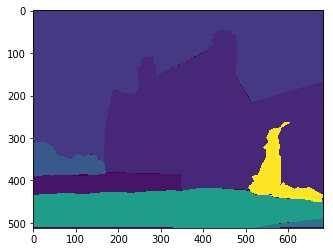

In [19]:

lbl= np.array(label)
print(lbl.shape, np.max(lbl), np.min(lbl))
imshow(lbl)

In [27]:
def __scale_shortside(img, target_width, method=Image.BICUBIC):
    ow, oh = img.size
    ss, ls = min(ow, oh), max(ow, oh)  # shortside and longside
    width_is_shorter = ow == ss
    if (ss == target_width):
        return img
    ls = int(target_width * ls / ss)
    nw, nh = (ss, ls) if width_is_shorter else (ls, ss)
    return img.resize((nw, nh), method)



In [28]:
from torchvision import transforms
def get_transform(load_size, method=Image.BICUBIC, normalize=True, toTensor=True):
    transform_list = []
    osize = [load_size, load_size]
    transform_list.append(transforms.Resize(osize, interpolation=method))
    transform_list.append(transforms.Lambda(lambda img: __scale_shortside(img, load_size, method)))

    if toTensor:
        transform_list += [transforms.ToTensor()]

    if normalize:
        transform_list += [transforms.Normalize((0.5, 0.5, 0.5),
                                                (0.5, 0.5, 0.5))]
    return transforms.Compose(transform_list)

In [43]:
tt= get_transform(128, method=Image.BICUBIC, normalize=False)


In [44]:

label = Image.open('../datasets/ADEChallengeData2016/annotations/validation/ADE_val_00000001.png')
lbl = np.array(label)
print(np.unique(lbl))
t_label = tt(label)

[ 0  1  2  3  5  7 10 18]


In [45]:
lbl = np.array(t_label)
print(lbl.shape)

(1, 128, 128)


In [46]:
np.unique(t_label)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568628,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313726, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.07450981],
      dtype=float32)

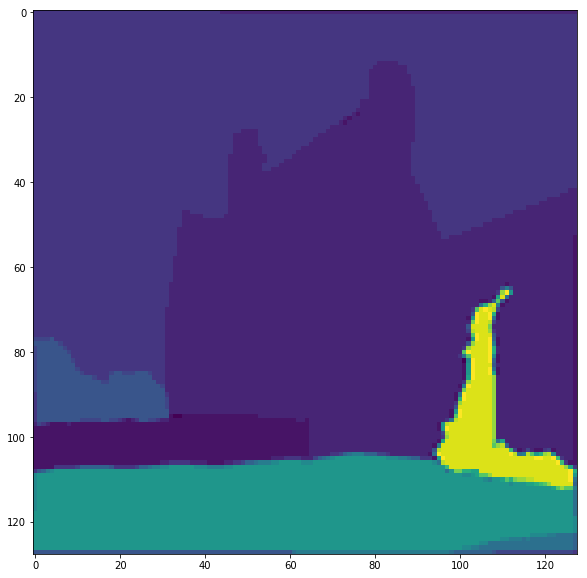

In [48]:
figure(figsize=(10,10))
imshow(lbl[0,:,:])

In [49]:
from scipy.io import loadmat

In [54]:
color_map = loadmat('../color150.mat')
color_map = color_map['colors']
print(color_map.shape)

(150, 3)


In [112]:
print(color_map)

[[120 120 120]
 [180 120 120]
 [  6 230 230]
 [ 80  50  50]
 [  4 200   3]
 [120 120  80]
 [140 140 140]
 [204   5 255]
 [230 230 230]
 [  4 250   7]
 [224   5 255]
 [235 255   7]
 [150   5  61]
 [120 120  70]
 [  8 255  51]
 [255   6  82]
 [143 255 140]
 [204 255   4]
 [255  51   7]
 [204  70   3]
 [  0 102 200]
 [ 61 230 250]
 [255   6  51]
 [ 11 102 255]
 [255   7  71]
 [255   9 224]
 [  9   7 230]
 [220 220 220]
 [255   9  92]
 [112   9 255]
 [  8 255 214]
 [  7 255 224]
 [255 184   6]
 [ 10 255  71]
 [255  41  10]
 [  7 255 255]
 [224 255   8]
 [102   8 255]
 [255  61   6]
 [255 194   7]
 [255 122   8]
 [  0 255  20]
 [255   8  41]
 [255   5 153]
 [  6  51 255]
 [235  12 255]
 [160 150  20]
 [  0 163 255]
 [140 140 140]
 [250  10  15]
 [ 20 255   0]
 [ 31 255   0]
 [255  31   0]
 [255 224   0]
 [153 255   0]
 [  0   0 255]
 [255  71   0]
 [  0 235 255]
 [  0 173 255]
 [ 31   0 255]
 [ 11 200 200]
 [255  82   0]
 [  0 255 245]
 [  0  61 255]
 [  0 255 112]
 [  0 255 133]
 [255   0 

In [69]:
a= np.random.randint(0,10,size=(3,4))
print(a)
np.where(a==0)[0]

[[6 3 2 7]
 [8 5 9 9]
 [6 5 0 7]]


array([2])

In [134]:
def label2rgb(label):
    rgbOut = np.zeros((label.size[1], label.size[0],3))
    label = (np.array(label))
    for cls in np.arange(1,151):
        inx, iny = np.where(label == cls)
        inx = list(inx)
        iny = list(iny)
        for ind, x in enumerate(inx):
            rgbOut[x, iny[ind],:] = color_map[cls-1,:]
    return rgbOut



In [102]:
import PIL

In [162]:
annot_path_src = '/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/*/*'
train_labels = glob.glob(annot_path_src)

img_path_src = '../datasets/ADEChallengeData2016/images/training/*'
img_src = glob.glob(img_path_src)
val_labels = '../datasets/ADEChallengeData2016/annotations_lab/validation/*'
val_labels = glob.glob(val_labels)
target_val = '../datasets/ADEChallengeData2016/annotations/validation'
target_label_train = '../datasets/ADE15c/annotations/training'


In [159]:
annot_rgb_path = '/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/*/*'
annot_rgb = glob.glob(annot_rgb_path)

In [143]:
train_ids = []
for im in train_labels:
    id_ = im.split('/')[-1].split('.png')[0]
    train_ids.append(id_)
    
val_ids = []
for im in val_labels:
    id_ = im.split('/')[-1].split('.png')[0]
    val_ids.append(id_)

In [141]:
print(train_labels[0])
print(annot_rgb[0])

../datasets/ADEChallengeData2016/annotations_lab/training/ADE_train_00011144.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004794_seg_rgb.png


In [145]:
from shutil import copyfile


In [165]:
for im in annot_rgb:
    print(im)
    name = im.split('/')[-1].split('_seg_rgb.png')[0]
    copyfile(im, '%s/%s.png'%(target_label_train, name))
        


/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004794_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004801_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004683_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004734_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004607_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004806_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004623_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004718_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004605_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004639_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bu

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004768_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004710_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004804_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004719_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004658_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004696_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004704_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004740_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004649_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004697_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bu

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004760_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004751_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004716_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004739_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004606_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004731_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004663_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004805_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004750_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/building_facade/ADE_train_00004738_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bu

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003275_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00004226_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003645_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003522_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003908_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003367_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000249_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003281_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000380_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000442_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000201_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/AD

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00004140_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003411_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003965_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000477_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003244_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003991_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000393_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003351_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003787_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003952_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00004114_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/AD

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003364_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00004186_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00004169_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003409_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003835_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003998_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000497_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003535_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00004091_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003374_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00004135_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/AD

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003440_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000337_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003219_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003659_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000340_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00004148_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003593_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003285_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003761_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003371_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003700_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/AD

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003498_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003804_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000448_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000261_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003672_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000266_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000481_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003770_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000470_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00004043_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003493_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/AD

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003538_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003987_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000303_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003796_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003442_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003585_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003572_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003691_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003405_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003477_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000537_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/AD

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003721_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003974_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000379_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003921_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00004068_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000236_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003423_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003234_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003960_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000524_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00004216_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/AD

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003384_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00004014_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003212_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003862_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000460_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003372_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003305_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003849_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000322_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000314_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003612_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/AD

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000205_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003402_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003812_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000372_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00004124_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000514_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003414_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003709_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003599_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000526_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00004016_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/AD

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00004166_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003622_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003954_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003614_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00004018_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003577_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003323_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003340_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00004088_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003539_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003833_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/AD

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003889_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003259_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000368_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003767_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00004145_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003209_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000297_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00003651_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00004175_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000293_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bedroom/ADE_train_00000211_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/AD

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/office/ADE_train_00014060_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/office/ADE_train_00014009_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/office/ADE_train_00014018_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/office/ADE_train_00014056_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/office/ADE_train_00014049_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/office/ADE_train_00014062_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/office/ADE_train_00014074_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/office/ADE_train_00014021_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/office/ADE_train_00014070_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/office/ADE_train_00014010_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/office/ADE_train_00014050_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/office

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/office/ADE_train_00014108_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016512_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016542_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016607_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016521_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016484_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016425_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016642_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016410_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016481_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016603_seg_rgb.png
/data1/sazadi/

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016553_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016466_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016618_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016404_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016537_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016372_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016489_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016672_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016578_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016364_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016442_seg_rgb.png
/data1/saz

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016362_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016505_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016406_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016366_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016668_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016419_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016593_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016657_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016499_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016397_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/skyscraper/ADE_train_00016605_seg_rgb.png
/data1/saz

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/mountain_snowy/ADE_train_00012166_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/mountain_snowy/ADE_train_00012090_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/mountain_snowy/ADE_train_00012059_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/mountain_snowy/ADE_train_00012155_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/mountain_snowy/ADE_train_00012152_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/mountain_snowy/ADE_train_00012131_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/mountain_snowy/ADE_train_00012114_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/mountain_snowy/ADE_train_00012109_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/mountain_snowy/ADE_train_00012097_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/mountain_snowy/ADE_train_00012121_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/mountain_sno

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00006863_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00006923_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00006867_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007050_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00006952_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00006928_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00006916_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007040_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007155_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007018_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007071_seg_rgb.png

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007077_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007084_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007098_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007162_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007126_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007157_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00006890_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007042_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007197_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007194_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00006931_seg_rgb.png

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00006865_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00006879_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007143_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007066_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007095_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007181_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007102_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00006938_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007057_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007255_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/dining_room/ADE_train_00007245_seg_rgb.png

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00006052_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00006142_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00006029_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00005982_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00006062_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00006140_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00006111_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00006042_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00006026_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00006097_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/co

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00006106_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00006138_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00006066_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00006055_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00006075_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00006100_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00006032_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00006139_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00006134_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/conference_room/ADE_train_00005989_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/co

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/hotel_room/ADE_train_00009617_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/hotel_room/ADE_train_00009630_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/hotel_room/ADE_train_00009648_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/hotel_room/ADE_train_00009540_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/hotel_room/ADE_train_00009676_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/hotel_room/ADE_train_00009570_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/hotel_room/ADE_train_00009532_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/hotel_room/ADE_train_00009560_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/hotel_room/ADE_train_00009613_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/hotel_room/ADE_train_00009615_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/hotel_room/ADE_train_00009529_seg_rgb.png
/data1/saz

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/corridor/ADE_train_00006258_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/corridor/ADE_train_00006305_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/corridor/ADE_train_00006332_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/corridor/ADE_train_00006316_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/corridor/ADE_train_00006360_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/corridor/ADE_train_00006352_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/corridor/ADE_train_00006319_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/corridor/ADE_train_00006349_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/corridor/ADE_train_00006359_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/corridor/ADE_train_00006321_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/corridor/ADE_train_00006361_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTo

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011132_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000770_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000844_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011360_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000837_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011274_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000898_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011378_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011182_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011510_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000756_seg_rgb.png

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000926_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000656_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000732_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011250_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011266_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011247_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011174_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011416_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011145_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011093_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011445_seg_rgb.png

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000847_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000708_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011469_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000851_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000838_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000715_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000905_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011183_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011486_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011300_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011370_seg_rgb.png

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011123_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011412_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000762_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011165_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000855_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000659_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011288_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011299_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011482_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011447_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011188_seg_rgb.png

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011194_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000808_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011258_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011162_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000921_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000724_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011275_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011473_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000814_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011318_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011399_seg_rgb.png

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011470_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000705_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011211_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011438_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000870_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011309_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000694_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00011195_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000699_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000805_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/living_room/ADE_train_00000843_seg_rgb.png

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/airport_terminal/ADE_train_00001127_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/airport_terminal/ADE_train_00001125_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/airport_terminal/ADE_train_00001149_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/airport_terminal/ADE_train_00001106_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/airport_terminal/ADE_train_00001124_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/airport_terminal/ADE_train_00001136_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/airport_terminal/ADE_train_00001160_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/airport_terminal/ADE_train_00001099_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/airport_terminal/ADE_train_00001123_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/airport_terminal/ADE_train_00001155_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002840_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00000046_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002895_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002773_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00000069_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002841_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002835_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002756_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002582_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00000082_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00000156_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTo

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002957_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00000099_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002897_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002978_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002959_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002921_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002706_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002733_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002652_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002624_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002774_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTo

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00003002_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00000177_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002613_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002852_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002993_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002554_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00000137_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002963_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00000183_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002989_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00000170_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTo

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00000039_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00003005_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002776_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002804_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002811_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002744_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002536_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002661_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002839_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00000100_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00003012_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTo

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002704_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002546_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002715_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002937_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00000126_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00000086_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002601_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00000064_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00000021_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002778_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00000045_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTo

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002622_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002810_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002545_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002819_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002971_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00000030_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002644_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002981_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002551_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/bathroom/ADE_train_00002587_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009129_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTor

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009037_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009213_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009140_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009280_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009267_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00008999_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009090_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009056_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009271_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009130_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009041_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/AD

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009080_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009203_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009085_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009278_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009060_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009166_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009058_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00008989_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009186_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009025_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/highway/ADE_train_00009008_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/AD

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010428_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010217_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010401_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010587_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010271_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010638_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010495_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010300_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010177_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010538_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010382_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/AD

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010669_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010557_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010641_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010583_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00000624_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010513_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010192_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010621_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00000595_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010707_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010452_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/AD

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010617_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010199_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010636_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010279_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010568_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010337_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010515_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010280_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010256_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010667_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010423_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/AD

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010451_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010708_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010741_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010294_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010657_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010339_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010345_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010392_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010181_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010150_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010712_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/AD

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010402_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00000610_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010174_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010246_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010676_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010740_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010391_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010610_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010517_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010324_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/kitchen/ADE_train_00010408_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/AD

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018231_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018602_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017196_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017830_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017363_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017758_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017445_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017376_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017974_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018142_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017642_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018723_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018279_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017177_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00016967_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017828_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017171_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018547_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017678_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00016939_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017442_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017498_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018829_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017826_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018552_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017504_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018847_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017294_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017448_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018170_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018366_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018610_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017480_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018593_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018885_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00016874_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017139_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00016989_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018736_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017457_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017444_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017620_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017813_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018247_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018750_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017691_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018727_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017538_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018694_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017387_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017227_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00016878_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00016903_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017355_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018701_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018570_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018565_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017571_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00016945_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017876_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018864_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018510_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018760_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017697_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017979_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017523_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018838_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017525_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018874_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017923_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018064_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017703_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017907_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017877_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017806_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018232_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017611_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018588_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018496_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017297_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018240_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018698_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017915_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018030_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018401_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018647_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017796_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018277_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017572_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018537_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018418_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018153_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00016995_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017102_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017849_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017795_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017296_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017952_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018280_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018627_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00016868_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017862_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017098_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018002_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00016959_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017174_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018159_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017770_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017067_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017426_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00016991_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018807_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018826_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017889_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018402_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017968_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017040_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017096_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018321_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017272_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017780_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018233_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017519_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018628_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017919_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018372_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018148_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017248_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017176_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017403_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017956_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018747_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017636_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018545_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018886_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018365_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00016948_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017929_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017103_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017302_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00016863_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018264_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018185_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017048_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017746_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017359_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017531_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017203_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017062_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018731_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018406_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018751_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018445_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017192_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018290_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018742_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017046_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018618_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018522_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017605_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00016955_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018833_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018584_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017680_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018235_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017201_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018050_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018304_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00016919_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017114_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00016884_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017687_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00016897_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018873_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017417_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017181_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017761_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017352_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018623_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017553_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017065_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017002_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018435_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017274_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00016926_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017978_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018188_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street

/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018328_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017918_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017284_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018385_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018730_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017513_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018816_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018757_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018145_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00017614_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street/ADE_train_00018068_seg_rgb.png
/data1/sazadi/segGAN/BigGAN-PyTorch/data/ADE15c/street

In [135]:
aa=[]
for im in train_labels[0:10]:
    print(im)
    aaa
    label = PIL.Image.open(im)
#     aa.append(np.max(label))
    rgb = label2rgb(label)
    imsave()
#     figure()
#     imshow(label)
#     figure()
#     imshow(rgb.astype('uint8'))
        

../datasets/ADEChallengeData2016/annotations_lab/training/ADE_train_00011144.png


NameError: name 'aaa' is not defined

In [119]:
np.max(aa)

150

In [ ]:
ADE_training = 